In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

data['time'] = pd.to_datetime(data['time'])

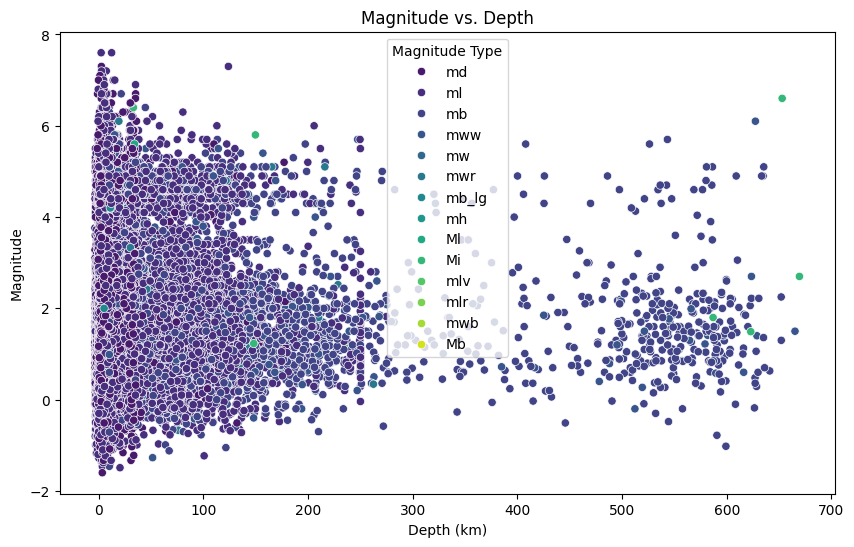

In [3]:
# Scatter plot of Magnitude vs. Depth
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='mag', data=data, hue='magType', palette='viridis')
plt.title('Magnitude vs. Depth')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.legend(title='Magnitude Type')
plt.show()

In [3]:


# Binning latitude and longitude
data['latitude_bin'] = pd.cut(data['latitude'], bins=30)
data['longitude_bin'] = pd.cut(data['longitude'], bins=30)

C:\Users\Soroush\AppData\Local\Temp\ipykernel_16668\109151515.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = data.pivot_table(index='latitude_bin', columns='longitude_bin', values='mag', aggfunc='count').fillna(0)


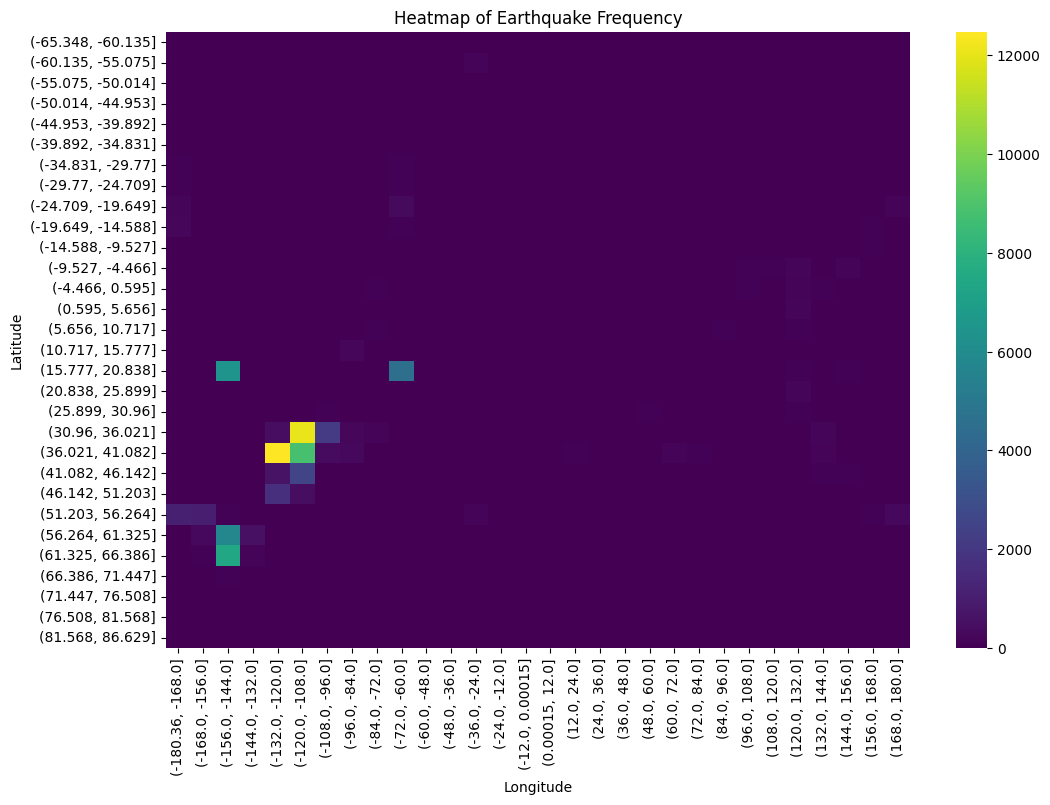

In [4]:


# Heatmap of Earthquake Frequency by Location
plt.figure(figsize=(12, 8))
heatmap_data = data.pivot_table(index='latitude_bin', columns='longitude_bin', values='mag', aggfunc='count').fillna(0)
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of Earthquake Frequency')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

C:\Users\Soroush\AppData\Local\Temp\ipykernel_23004\4064025214.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('time')['mag'].resample('M').count().plot()


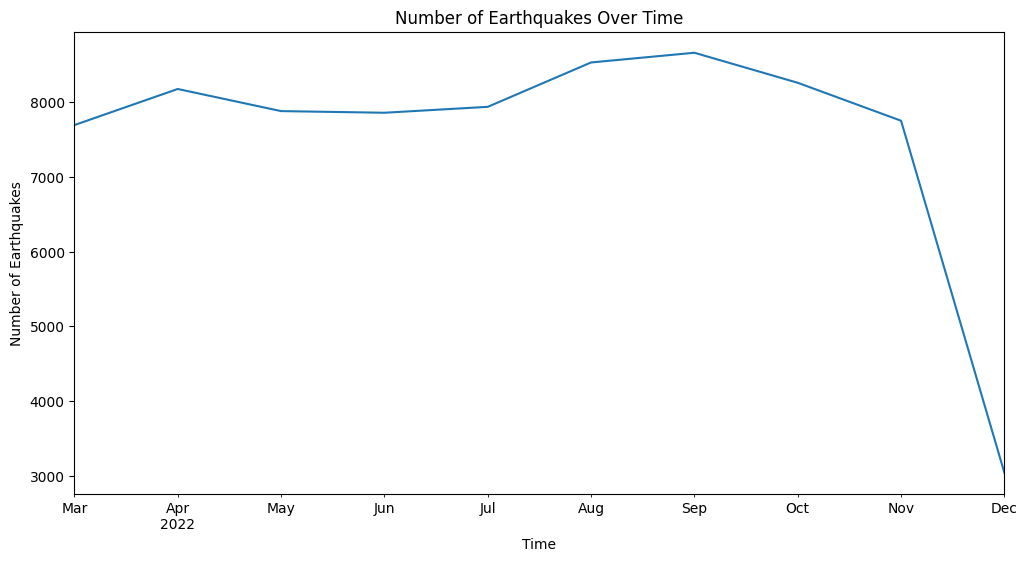

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

data['time'] = pd.to_datetime(data['time'])
# Time Series Analysis of Earthquakes
plt.figure(figsize=(12, 6))
data.set_index('time')['mag'].resample('M').count().plot()
plt.title('Number of Earthquakes Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Earthquakes')
plt.show()

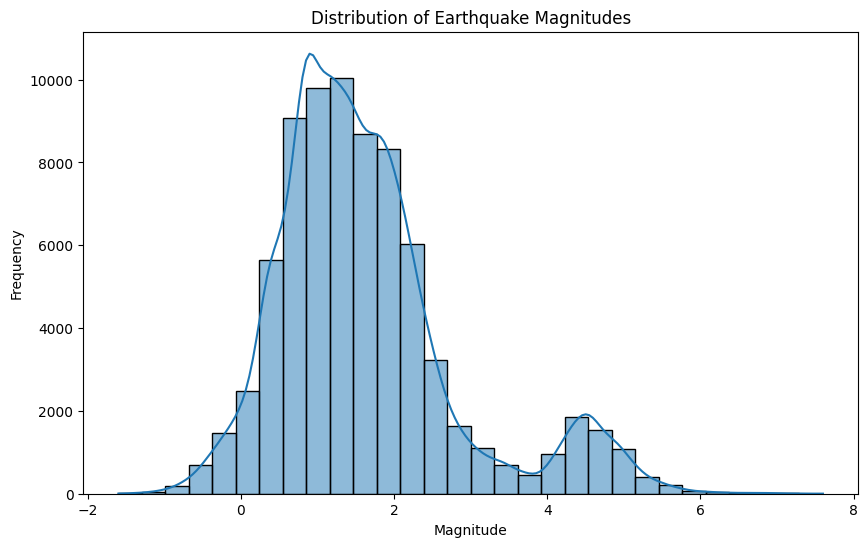

In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

# Bar Chart of Earthquake Magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(data['mag'], bins=30, kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

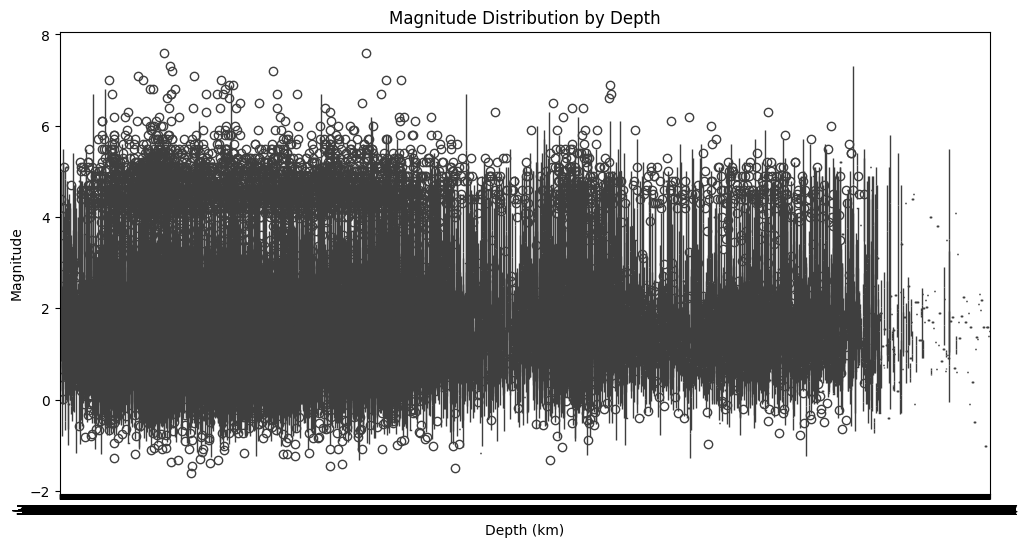

In [7]:


# Box Plot of Magnitude by Depth
plt.figure(figsize=(12, 6))
sns.boxplot(x='depth', y='mag', data=data)
plt.title('Magnitude Distribution by Depth')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

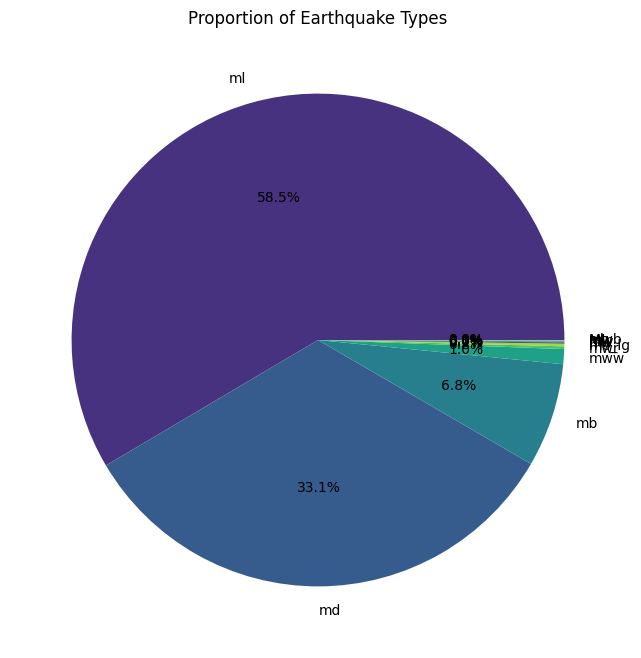

In [8]:


# Pie Chart of Earthquake Types
plt.figure(figsize=(8, 8))
data['magType'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Proportion of Earthquake Types')
plt.ylabel('')
plt.show()

In [9]:
import lightningchart as lc
import random

with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)
# here the reason of why we need lookup_values is 
n = 100000
x_values = [random.gauss(0, 1) for _ in range(n)]
y_values = [random.gauss(0, 1) for _ in range(n)]
lookup_values = [random.uniform(0, 1) for _ in range(n)]

chart = lc.ScatterChart(
    theme=lc.Themes.White,
    title='Scatter Chart',
    point_shape='triangle',
    xlabel='x',
    ylabel='y',
    individual_colors=True,
    individual_lookup_values=True
)
series = chart.series.append_samples(
    x_values=x_values,
    y_values=y_values,
    lookup_values=lookup_values
)
series.set_palette_colors(
    steps=[
        {'value': 0, 'color': lc.Color(0, 64, 128)},
        {'value': 1, 'color': lc.Color(255, 128, 64)},
    ],
    look_up_property='value',
    percentage_values=False
)
legend = chart.add_legend(data=chart).set_title('')
chart.open()

In [18]:
import lightningchart as lc
import pandas as pd
import numpy as np
import builtins

with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

x_values = data['depth'].values.tolist()
y_values = data['mag'].values.tolist()
min_value=int(builtins.min(y_values))
max_value=int(builtins.max(y_values))
lookup_values = y_values

chart = lc.ScatterChart(
    theme=lc.Themes.White,
    title='Magnitude vs. Depth',
    point_shape='circle',
    xlabel='Depth (km)',
    ylabel='Magnitude',
    individual_colors=True,
    individual_lookup_values=True
)
series = chart.series.append_samples(
    x_values=x_values,
    y_values=y_values,
    lookup_values=lookup_values
)
series.set_palette_colors(
    steps=[
        {'value': min_value, 'color': lc.Color(0, 64, 128)},
        {'value': max_value, 'color': lc.Color(255, 128, 64)},
    ],
    look_up_property='value',
    percentage_values=False
)
legend = chart.add_legend(data=chart).set_title('Magnitude')
chart.open()


127.0.0.1 - - [18/Jul/2024 15:22:18] "GET / HTTP/1.1" 200 -


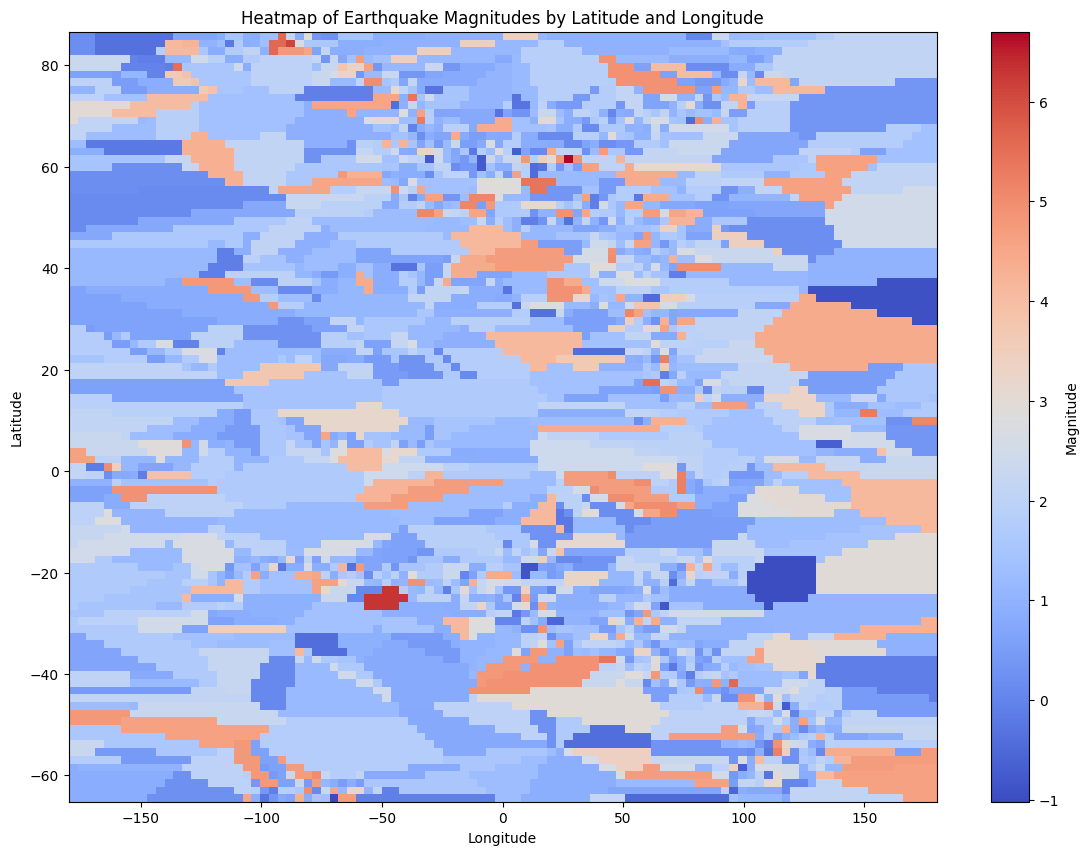

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

# Create a grid to interpolate the magnitude values
latitudes = np.linspace(data['latitude'].min(), data['latitude'].max(), 100)
longitudes = np.linspace(data['longitude'].min(), data['longitude'].max(), 100)
lat_grid, lon_grid = np.meshgrid(latitudes, longitudes)

# Interpolate magnitude values on the grid
mag_grid = np.zeros_like(lat_grid)
grid_z=[]
# Simple nearest neighbor interpolation for this example
for i in range(lat_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        # Find the closest point in the dataset
        distances = np.sqrt((data['latitude'] - lat_grid[i, j])**2 + (data['longitude'] - lon_grid[i, j])**2)
        closest_index = distances.idxmin()
        mag_grid[i, j] = data.loc[closest_index, 'mag']
        grid_z.append(data.loc[closest_index, 'mag'])

# Plot the heatmap
plt.figure(figsize=(14, 10))
plt.imshow(mag_grid, extent=(data['longitude'].min(), data['longitude'].max(), data['latitude'].min(), data['latitude'].max()), origin='lower', cmap='coolwarm', aspect='auto')
plt.colorbar(label='Magnitude')
plt.title('Heatmap of Earthquake Magnitudes by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [17]:
import lightningchart as lc
import pandas as pd
import numpy as np
import builtins

with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

# Create a grid to interpolate the magnitude values
latitudes = np.linspace(data['latitude'].min(), data['latitude'].max(), 100)
longitudes = np.linspace(data['longitude'].min(), data['longitude'].max(), 100)
lat_grid, lon_grid = np.meshgrid(latitudes, longitudes)

# Interpolate magnitude values on the grid
mag_grid = np.zeros_like(lat_grid)
grid_z = []
# Simple nearest neighbor interpolation for this example
for i in range(lat_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        # Find the closest point in the dataset
        distances = np.sqrt((data['latitude'] - lat_grid[i, j])**2 + (data['longitude'] - lon_grid[i, j])**2)
        closest_index = distances.idxmin()
        mag_grid[i, j] = data.loc[closest_index, 'mag']
        grid_z.append(data.loc[closest_index, 'mag'])
print(min(grid_z))
print(max(grid_z))
# Flatten the grid for the heatmap
mag_grid_flat = mag_grid.flatten()

# Create the chart
chart = lc.ChartXY(
    title="Heatmap of Earthquake Magnitudes by Latitude and Longitude",
    theme=lc.Themes.White  # Use White theme
)

# Create the heatmap series
heatmap_series = chart.add_heatmap_grid_series(
    columns=len(longitudes),
    rows=len(latitudes),
    x_axis=chart.get_default_x_axis(),
    y_axis=chart.get_default_y_axis()
)

# Set the data for the heatmap
heatmap_series.invalidate_intensity_values(mag_grid)

# Set start and end coordinates
heatmap_series.set_start(x=data['longitude'].min(), y=data['latitude'].min())
heatmap_series.set_end(x=data['longitude'].max(), y=data['latitude'].max())

# Simplified custom palette
custom_palette = [
    {"value": np.nanmin(grid_z), "color": lc.Color(0, 0, 255)},       # Blue
    {"value": np.nanpercentile(grid_z, 25), "color": lc.Color(0, 255, 255)},     # Cyan
    {"value": np.nanmedian(grid_z), "color": lc.Color(0, 255, 0)},    # Green
    {"value": np.nanpercentile(grid_z, 75), "color": lc.Color(255, 255, 0)},     # Yellow
    {"value": np.nanmax(grid_z), "color": lc.Color(255, 0, 0)},        # Red
]

heatmap_series.set_palette_colors(
    steps=custom_palette,
    look_up_property='value',
    interpolate=True
)

# Set axis titles
chart.get_default_x_axis().set_title('Longitude')
chart.get_default_y_axis().set_title('Latitude')

# Set axis limits based on the actual data ranges
chart.get_default_x_axis().set_interval(data['longitude'].min(), data['longitude'].max())
chart.get_default_y_axis().set_interval(data['latitude'].min(), data['latitude'].max())
chart.add_legend(data=heatmap_series)

chart.open()


-1.02
6.7


127.0.0.1 - - [18/Jul/2024 12:14:57] "GET / HTTP/1.1" 200 -


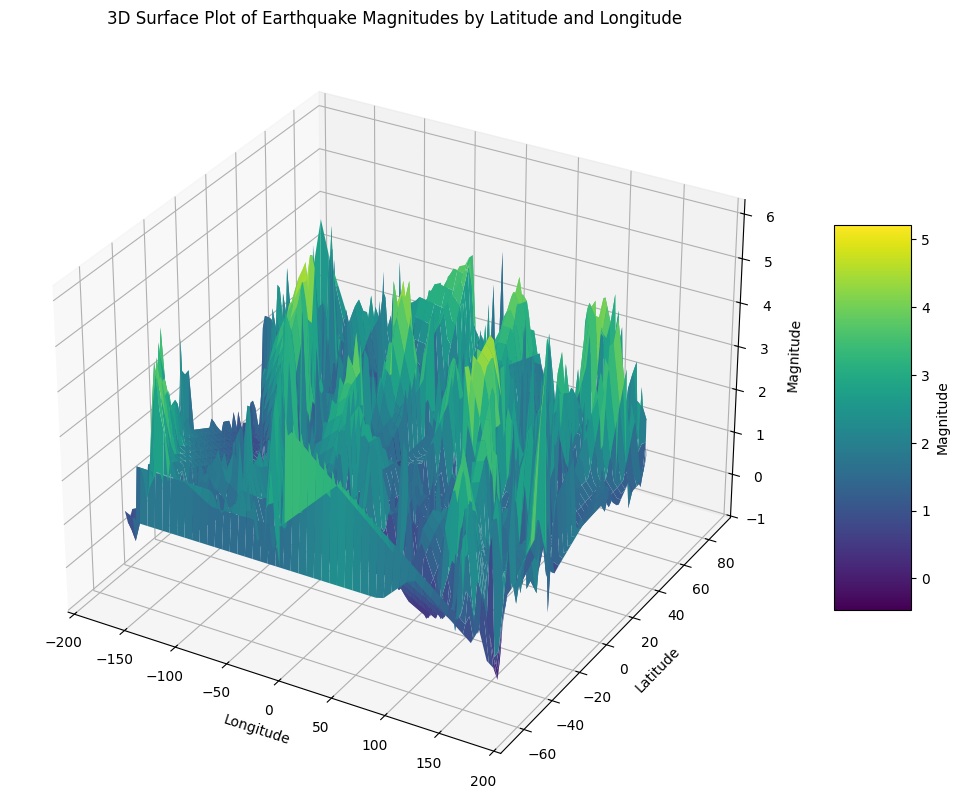

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Load the data
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

# Extract the data for the 3D plot
latitudes = data['latitude']
longitudes = data['longitude']
magnitudes = data['mag']

# Create grid data for the surface plot
grid_lat, grid_lon = np.meshgrid(
    np.linspace(latitudes.min(), latitudes.max(), 100),
    np.linspace(longitudes.min(), longitudes.max(), 100)
)
grid_mag = griddata(
    (latitudes, longitudes), magnitudes,
    (grid_lat, grid_lon),
    method='linear'
)

# Plot the 3D surface
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(grid_lon, grid_lat, grid_mag, cmap='viridis')

# Add a color bar which maps values to colors
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5, label='Magnitude')

# Set labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Magnitude')
ax.set_title('3D Surface Plot of Earthquake Magnitudes by Latitude and Longitude')

plt.show()


In [41]:
import lightningchart as lc
import pandas as pd
import numpy as np
from scipy.interpolate import griddata

# Read the license key from a file
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load data from the CSV file
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

# Extract latitude, longitude, and magnitude values
latitudes = data['latitude'].values
longitudes = data['longitude'].values
magnitudes = data['mag'].values

# Print some sample data for debugging
print(f"Sample latitudes: {latitudes[:5]}")
print(f"Sample longitudes: {longitudes[:5]}")
print(f"Sample magnitudes: {magnitudes[:5]}")

# Check for NaN values in the magnitudes
print(f"NaN values in magnitudes: {np.isnan(magnitudes).sum()}")

# Create grid data for the surface plot
grid_lat, grid_lon = np.meshgrid(
    np.linspace(latitudes.min(), latitudes.max(), 100),
    np.linspace(longitudes.min(), longitudes.max(), 100)
)

# Perform interpolation
grid_mag = griddata(
    (latitudes, longitudes), magnitudes,
    (grid_lat, grid_lon),
    method='linear'
)

# Fill NaN values with the mean of the magnitudes
nan_mask = np.isnan(grid_mag)
grid_mag[nan_mask] = np.nanmean(magnitudes)

# Print interpolated magnitudes
print(f"Interpolated magnitudes shape: {grid_mag.shape}")
print(f"Interpolated magnitudes sample:\n{grid_mag[:5, :5]}")

# Initialize a 3D chart
chart = lc.Surface3D(
    data=grid_mag.tolist(),
    min_value=np.nanmin(grid_mag),
    max_value=np.nanmax(grid_mag),
    min_color=lc.Color(192, 0, 0),
    max_color=lc.Color(0, 255, 255),
    theme=lc.Themes.White,
    title='3D Surface of Earthquake Magnitudes',
     xlabel='Longitude',
    ylabel='Magnitude',
    zlabel='Latitude'
)

# Open the chart
chart.open()


Sample latitudes: [38.7596664 38.8338318 35.5966682 35.9291667 62.3602   ]
Sample longitudes: [-122.7196655 -122.8154984 -120.2713318 -117.6608333 -149.6345   ]
Sample magnitudes: [1.24 1.13 2.31 0.88 1.4 ]
NaN values in magnitudes: 0
Interpolated magnitudes shape: (100, 100)
Interpolated magnitudes sample:
[[1.63124184 1.63124184 1.63124184 1.63124184 1.63124184]
 [1.63124184 1.63124184 1.63124184 1.63124184 1.63124184]
 [1.63124184 1.63124184 1.63124184 1.63124184 1.63124184]
 [1.63124184 1.63124184 1.63124184 0.77724751 0.77054212]
 [1.63124184 1.23889724 0.93928649 0.93258111 1.14202492]]


127.0.0.1 - - [18/Jul/2024 16:33:47] "GET / HTTP/1.1" 200 -


In [2]:
import lightningchart as lc
import pandas as pd
import numpy as np
from scipy.interpolate import griddata

# Read the license key from a file
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load data from the CSV file
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

# Extract latitude, longitude, and magnitude values
latitudes = data['latitude'].values
longitudes = data['longitude'].values
magnitudes = data['mag'].values

# Print some sample data for debugging
print(f"Sample latitudes: {latitudes[:5]}")
print(f"Sample longitudes: {longitudes[:5]}")
print(f"Sample magnitudes: {magnitudes[:5]}")

# Check for NaN values in the magnitudes
print(f"NaN values in magnitudes: {np.isnan(magnitudes).sum()}")

# Create grid data for the surface plot
grid_lat, grid_lon = np.meshgrid(
    np.linspace(latitudes.min(), latitudes.max(), 100),
    np.linspace(longitudes.min(), longitudes.max(), 100)
)

# Perform interpolation
grid_mag = griddata(
    (latitudes, longitudes), magnitudes,
    (grid_lat, grid_lon),
    method='linear'
)

# Fill NaN values with the mean of the magnitudes
nan_mask = np.isnan(grid_mag)
grid_mag[nan_mask] = np.nanmean(magnitudes)

# Print interpolated magnitudes
print(f"Interpolated magnitudes shape: {grid_mag.shape}")
print(f"Interpolated magnitudes sample:\n{grid_mag[:5, :5]}")
#print max and min values in grid_mag
print(f"Max and min values in grid_mag: {np.nanmax(grid_mag)}, {np.nanmin(grid_mag)}")

# Initialize a 3D chart
chart = lc.Chart3D(
    theme=lc.Themes.White,
    title='3D Surface of Earthquake Magnitudes'
)

# Create a SurfaceGridSeries
surface_series = chart.add_surface_grid_series(
    columns=grid_mag.shape[1],
    rows=grid_mag.shape[0]
)

# Set start and end coordinates
surface_series.set_start(x=longitudes.min(), z=latitudes.min())
surface_series.set_end(x=longitudes.max(), z=latitudes.max())

# Set step size
surface_series.set_step(
    x=(longitudes.max() - longitudes.min()) / grid_mag.shape[1],
    z=(latitudes.max() - latitudes.min()) / grid_mag.shape[0]
)

# Invalidate height map
surface_series.invalidate_height_map(grid_mag.tolist())
surface_series.invalidate_intensity_values(grid_mag.tolist())

# Define custom palette
surface_series.set_palette_colors(
    steps=[
    {"value": np.nanmin(grid_mag), "color": lc.Color(0, 0, 255)},       # Blue
    {"value": np.nanpercentile(grid_mag, 25), "color": lc.Color(0, 255, 255)},     # Cyan
    {"value": np.nanmedian(grid_mag), "color": lc.Color(0, 255, 0)},    # Green
    {"value": np.nanpercentile(grid_mag, 75), "color": lc.Color(255, 255, 0)},     # Yellow
    {"value": np.nanmax(grid_mag), "color": lc.Color(255, 0, 0)}        # Red
    ],
    look_up_property='value',
    percentage_values=False
)

# Set axis titles
chart.get_default_x_axis().set_title('Longitude')
chart.get_default_y_axis().set_title('Latitude')
chart.get_default_z_axis().set_title('Magnitude')

# Open the chart
chart.open()


Sample latitudes: [38.7596664 38.8338318 35.5966682 35.9291667 62.3602   ]
Sample longitudes: [-122.7196655 -122.8154984 -120.2713318 -117.6608333 -149.6345   ]
Sample magnitudes: [1.24 1.13 2.31 0.88 1.4 ]
NaN values in magnitudes: 0
Interpolated magnitudes shape: (100, 100)
Interpolated magnitudes sample:
[[1.63124184 1.63124184 1.63124184 1.63124184 1.63124184]
 [1.63124184 1.63124184 1.63124184 1.63124184 1.63124184]
 [1.63124184 1.63124184 1.63124184 1.63124184 1.63124184]
 [1.63124184 1.63124184 1.63124184 0.77724751 0.77054212]
 [1.63124184 1.23889724 0.93928649 0.93258111 1.14202492]]
Max and min values in grid_mag: 6.173572249254034, -0.8933411995606557


127.0.0.1 - - [18/Jul/2024 21:58:25] "GET / HTTP/1.1" 200 -


In [6]:
import lightningchart as lc
import pandas as pd
import numpy as np
import builtins

with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

# Create a grid to interpolate the magnitude values
latitudes = np.linspace(data['latitude'].min(), data['latitude'].max(), 100)
longitudes = np.linspace(data['longitude'].min(), data['longitude'].max(), 100)
lat_grid, lon_grid = np.meshgrid(latitudes, longitudes)

# Interpolate magnitude values on the grid
mag_grid = np.zeros_like(lat_grid)
grid_z = []
# Simple nearest neighbor interpolation for this example
for i in range(lat_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        # Find the closest point in the dataset
        distances = np.sqrt((data['latitude'] - lat_grid[i, j])**2 + (data['longitude'] - lon_grid[i, j])**2)
        closest_index = distances.idxmin()
        mag_grid[i, j] = data.loc[closest_index, 'mag']
        grid_z.append(data.loc[closest_index, 'mag'])

# Flatten the grid for the heatmap
mag_grid_flat = mag_grid.flatten()

# Create the chart
chart = lc.Chart3D(
    title="3D Surface of Earthquake Magnitudes",
    theme=lc.Themes.White 
)

# Create the heatmap series
surface_series = chart.add_surface_grid_series(
    columns=mag_grid.shape[1],
    rows=mag_grid.shape[0]
)

# Set the data for the heatmap
surface_series.invalidate_intensity_values(mag_grid)
surface_series.set_intensity_interpolation(False)

# Set start and end coordinates
surface_series.set_start(x=data['longitude'].min(), z=data['latitude'].min())
surface_series.set_end(x=data['longitude'].max(), z=data['latitude'].max())


# Set step size
surface_series.set_step(
    x=(longitudes.max() - longitudes.min()) / mag_grid.shape[1],
    z=(latitudes.max() - latitudes.min()) / mag_grid.shape[0]
)

# Invalidate height map
surface_series.invalidate_height_map(mag_grid.tolist())


# Simplified custom palette
custom_palette = [
    {"value": np.nanmin(grid_z), "color": lc.Color(0, 0, 255)},       # Blue
    {"value": np.nanpercentile(grid_z, 25), "color": lc.Color(0, 255, 255)},     # Cyan
    {"value": np.nanmedian(grid_z), "color": lc.Color(0, 255, 0)},    # Green
    {"value": np.nanpercentile(grid_z, 75), "color": lc.Color(255, 255, 0)},     # Yellow
    {"value": np.nanmax(grid_z), "color": lc.Color(255, 0, 0)},        # Red
]

surface_series.set_palette_colors(
    steps=custom_palette,
    look_up_property='value',
    percentage_values=False
)

# Invalidate intensity values (for color mapping)
surface_series.invalidate_intensity_values(mag_grid.tolist())

# Set axis titles
chart.get_default_x_axis().set_title('Longitude')
chart.get_default_y_axis().set_title('Latitude')
chart.get_default_z_axis().set_title('Magnitude')

# Set axis limits based on the actual data ranges
# chart.get_default_x_axis().set_interval(data['longitude'].min(), data['longitude'].max())
# chart.get_default_y_axis().set_interval(data['latitude'].min(), data['latitude'].max())
chart.add_legend(data=surface_series)

chart.open()


127.0.0.1 - - [18/Jul/2024 22:11:59] "GET / HTTP/1.1" 200 -


In [11]:
import pandas as pd
import lightningchart as lc

with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

data['time'] = pd.to_datetime(data['time'])

x_values = list(data['time'])
y_values = []
y = 0
for i in range(100):
    y += random.random() * 2 - 1
    y_values.append(y)

chart = lc.LineChart(
    x=x_values,
    y=y_values,
    line_type='pointline',
    line_color=lc.Color(0, 128, 255),
    line_width=4,
    point_shape='circle',
    point_color=lc.Color(0, 0, 255),
    point_size=6,
    theme=lc.Themes.White,
    title='Line Chart',
    xlabel='x',
    ylabel='y',
)
chart.open()


127.0.0.1 - - [18/Jul/2024 22:47:17] "GET / HTTP/1.1" 200 -


In [3]:
import pandas as pd
import lightningchart as lc
from datetime import datetime

with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# Resample data by month and count the number of earthquakes
monthly_data = data.set_index('time').resample('M').size()

# Prepare the data for LightningChart
x_values = [datetime.timestamp(d) * 1000 for d in monthly_data.index]  # Convert to timestamp in milliseconds
y_values = monthly_data.values.tolist()

# Create the chart
chart = lc.ChartXY(
    theme=lc.Themes.White,
    title='Number of Earthquakes Over Time'
)

# Add a line series
line_series = chart.add_line_series()
line_series.set_name('Earthquakes')
line_series.set_line_color(lc.Color(0, 0, 255))
line_series.set_line_thickness(2)

# Append data to the series
line_series.append_samples(
    x_values=x_values,
    y_values=y_values
)

# Customize x-axis
x_axis = chart.get_default_x_axis()
x_axis.set_title('Time')
x_axis.set_tick_strategy('DateTime', utc=True)

# Customize y-axis
y_axis = chart.get_default_y_axis()
y_axis.set_title('Number of Earthquakes')

chart.open()


C:\Users\Soroush\AppData\Local\Temp\ipykernel_24488\1784906961.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.set_index('time').resample('M').size()


127.0.0.1 - - [22/Jul/2024 08:50:56] "GET / HTTP/1.1" 200 -


In [19]:
import pandas as pd
import lightningchart as lc
import seaborn as sns

# Set your LightningChart license key
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the dataset
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

# Calculate the proportions of each earthquake type
mag_type_counts = data['type'].value_counts()

# Prepare the data for LightningChart
slices_data = [{'name': mag_type, 'value': count} for mag_type, count in mag_type_counts.items()]

# Create the pie chart
chart = lc.PieChart(
    labels_inside_slices=False,
    title='Proportion of Earthquake Types',
    theme=lc.Themes.White
)

# Add slices to the pie chart
chart.add_slices(slices_data)

# Set the inner radius for a donut chart effect (optional, can be set to 0 for a standard pie chart)
chart.set_inner_radius(50)

# Open the chart in the browser
chart.open()


127.0.0.1 - - [22/Jul/2024 09:35:11] "GET / HTTP/1.1" 200 -
